In [120]:
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from matplotlib.patches import Patch

In [121]:
Typ = ["simple","simple_I0","meta"][1]
siz = ["10","100","1000"][:]
point = ["_point", ""][1]

In [122]:
#get pickle
plot_dict = {}
for i in siz:
    with open(f"../../Data/R0_3/Sims_SIR/Pickles/Sim_dict{point}_{Typ}_{i}.pickle", 'rb') as handle:
        out_dict = pickle.load(handle)
    plot_dict[f"Size_{i}"] = out_dict
    print(f" The Proportions of extinctions for N={i}:{sum(out_dict['Extinction'])/1000}")

 The Proportions of extinctions for N=10:0.412
 The Proportions of extinctions for N=100:0.363
 The Proportions of extinctions for N=1000:0.33


In [123]:
print(plot_dict)

{'Size_10': {'Extinction': [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 

In [124]:
point_dict = {}
point = ["_point", ""][0]
for i in siz:
    with open(f"../../Data/R0_3/Sims_SIR/Pickles/Sim_dict{point}_{Typ}_{i}.pickle", 'rb') as handle:
        out_dict = pickle.load(handle)
    point_dict[f"Size_{i}"] = out_dict

C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

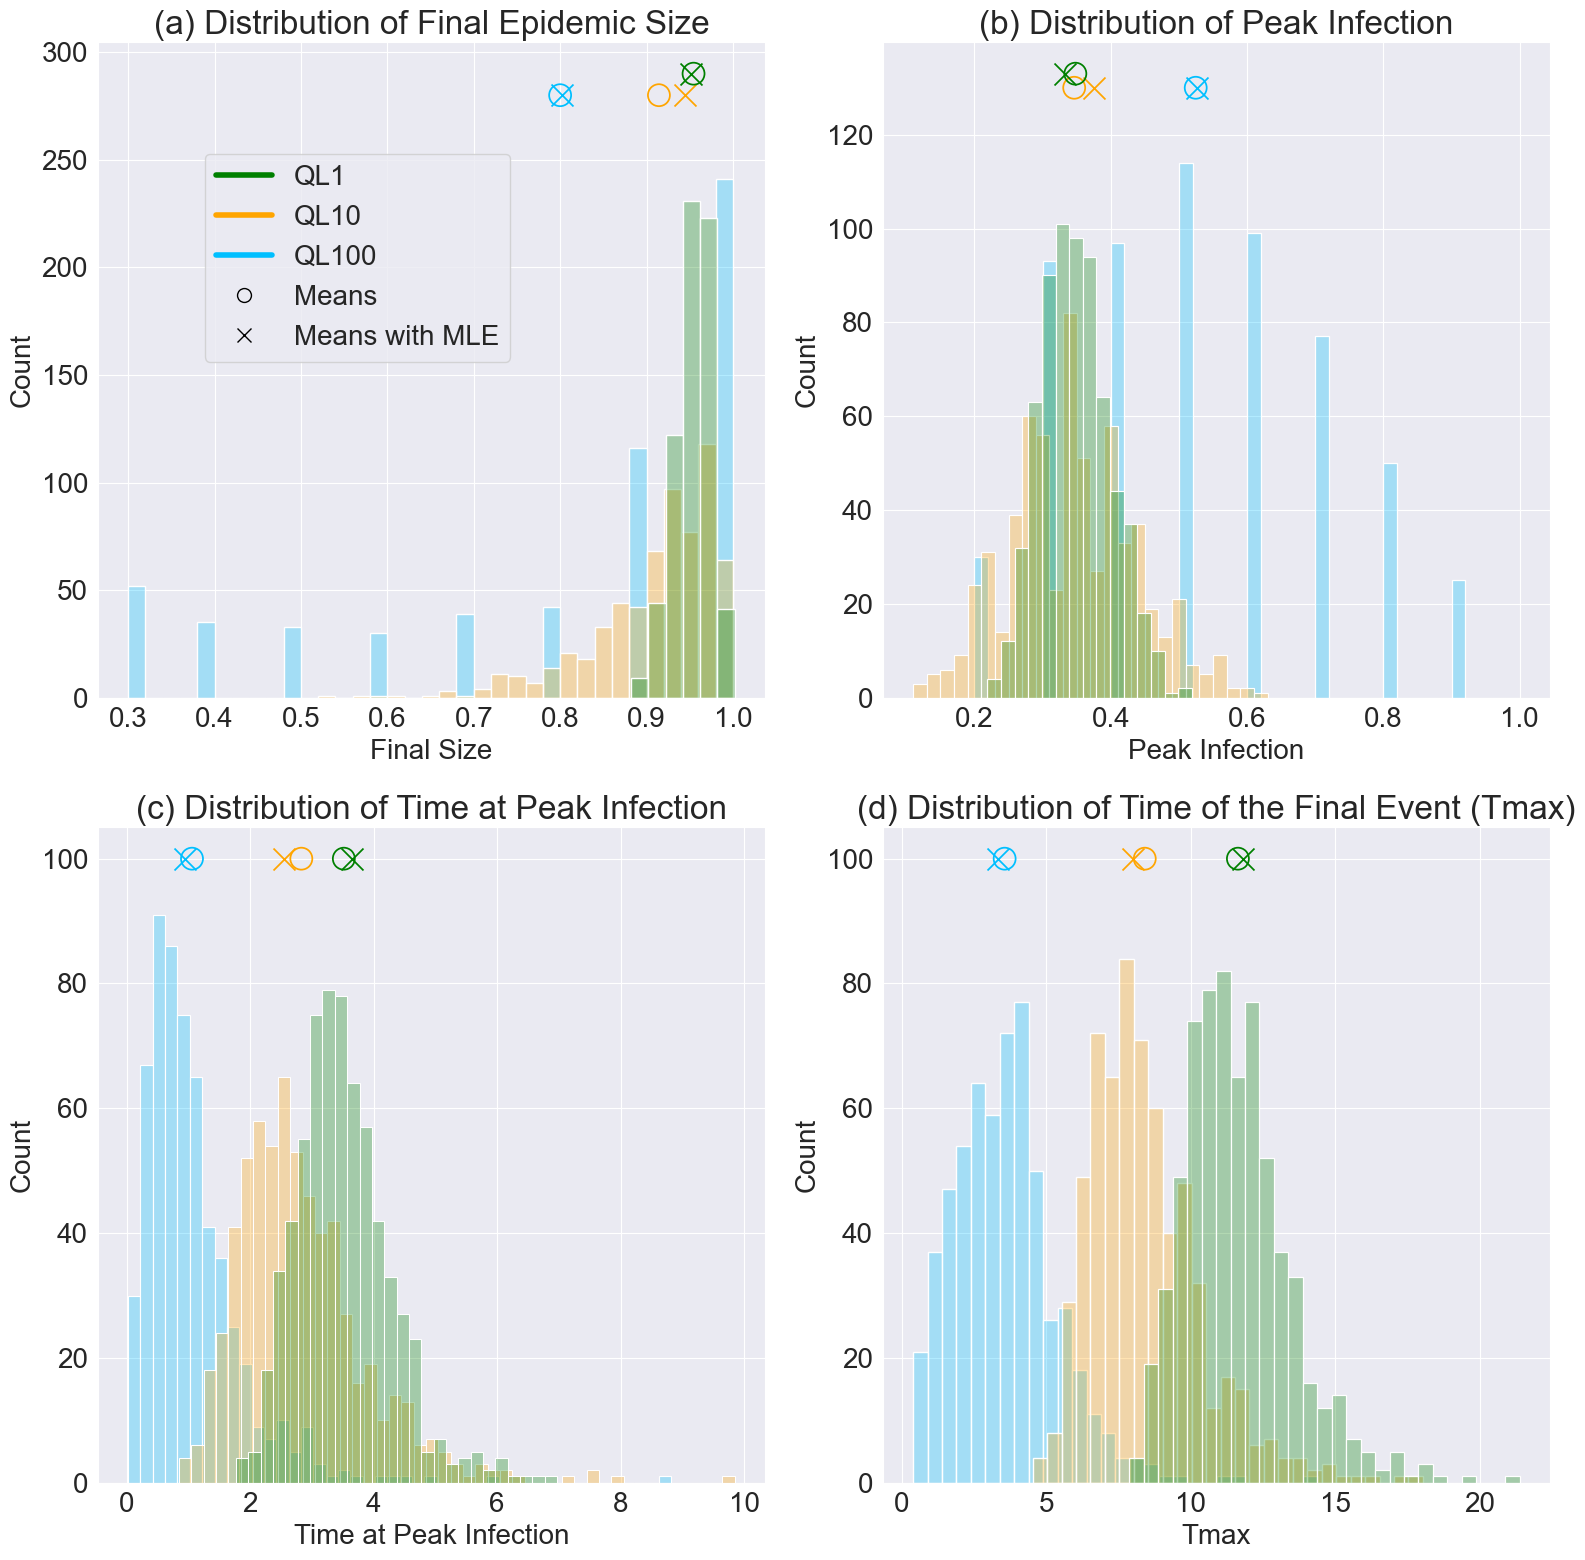

In [133]:
if Typ == "simple_I0":
    fig,ax0 = plt.subplots(figsize = (16,16), nrows = 2, ncols = 2)
    ax0 = ax0.flatten()
    colours = ["deepskyblue","orange","green"]
    counter = -1
    point_size = 250
    ax0[0].set_title("(a) Distribution of Final Epidemic Size")
    ax0[3].set_title("(d) Distribution of Time of the Final Event (Tmax)")
    ax0[1].set_title("(b) Distribution of Peak Infection")
    ax0[2].set_title("(c) Distribution of Time at Peak Infection")
    for i in siz:
        counter +=1
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[0],binwidth = 0.02,color=colours[counter],alpha = 0.3)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[3],binwidth = 0.5,color=colours[counter],alpha = 0.3)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[1],binwidth = 0.02,color=colours[counter],alpha = 0.3)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[2],binwidth = 0.2,color=colours[counter],alpha = 0.3)

        #plot means
        if counter != 2:
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[280],ax=ax0[0], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[100], ax=ax0[3], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[130], ax=ax0[1], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[100], color=colours[counter],ax=ax0[2],s=point_size,fc="none",ec =colours[counter])

            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[280],ax=ax0[0], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tmax"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[100], ax=ax0[3], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[130], ax=ax0[1], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[100], color=colours[counter],ax=ax0[2],marker="x",s=point_size)
        else:
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[290],ax=ax0[0], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[100], ax=ax0[3], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[133], ax=ax0[1], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[100], color=colours[counter],ax=ax0[2],s=point_size,fc="none",ec =colours[counter])

            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[290],ax=ax0[0], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tmax"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[100], ax=ax0[3], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[133], ax=ax0[1], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[100], color=colours[counter],ax=ax0[2],marker="x",s=point_size)


    ax0[0].set_xlabel("Final Size")
    ax0[3].set_xlabel("Tmax")
    ax0[1].set_xlabel("Peak Infection")
    ax0[2].set_xlabel("Time at Peak Infection")
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='QL1'),
                   Line2D([0], [0], color='orange',lw=4, label='QL10'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='QL100'),  Line2D([], [], marker='o', color='black', label='Means',
                          markerfacecolor='none', markersize=10, linestyle=""),Line2D([], [], marker='x', color='black', label='Means with MLE',
                          markerfacecolor='black', markersize=10, linestyle="")]
    fig.legend(handles=legend_elements, bbox_to_anchor = (0.34,0.9))
    fig.tight_layout()
    fig.show()

In [126]:
if Typ == "simple":
    fig,ax0 = plt.subplots(figsize = (16,16), nrows = 2, ncols = 2)
    ax0 = ax0.flatten()
    colours = ["deepskyblue","orange","green"]
    counter = -1
    point_size = 250
    font = {'size': 20}
    plt.rc('font', **font)
    ax0[0].set_title("(a) Distribution of Final Epidemic Size")
    ax0[3].set_title("(d) Distribution of Time of the Final Event (Tmax)")
    ax0[1].set_title("(b) Distribution of Peak Infection")
    ax0[2].set_title("(c) Distribution of Time at Peak Infection")
    for i in siz:
        counter +=1
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[0],binwidth = 0.02,color=colours[counter],alpha = 0.3)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[3],binwidth = 0.5,color=colours[counter],alpha = 0.3)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[1],binwidth = 0.02,color=colours[counter],alpha = 0.3)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[2],binwidth = 0.2,color=colours[counter],alpha = 0.3)

        #plot means
        if counter != 2:
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[520],ax=ax0[0], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[160], ax=ax0[3], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[260], ax=ax0[1], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[420], color=colours[counter],ax=ax0[2],s=point_size,fc="none",ec =colours[counter])

            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[520],ax=ax0[0], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tmax"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[160], ax=ax0[3], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[260], ax=ax0[1], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[420], color=colours[counter],ax=ax0[2],marker="x",s=point_size)
        else:
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[530],ax=ax0[0], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[160], ax=ax0[3], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[260], ax=ax0[1], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
            sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[430], color=colours[counter],ax=ax0[2],s=point_size,fc="none",ec =colours[counter])

            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[530],ax=ax0[0], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tmax"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]), y =[160], ax=ax0[3], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[260], ax=ax0[1], color=colours[counter],marker="x",s=point_size)
            sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[430], color=colours[counter],ax=ax0[2],marker="x",s=point_size)



    ax0[0].set_xlabel("Final Size")
    ax0[3].set_xlabel("Tmax")
    ax0[1].set_xlabel("Peak Infection")
    ax0[2].set_xlabel("Time at Peak Infection")
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='QL1'),
                   Line2D([0], [0], color='orange',lw=4, label='QL10'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='QL100'),  Line2D([], [], marker='o', color='black', label='Means',
                          markerfacecolor='none', markersize=10, linestyle=""),Line2D([], [], marker='x', color='black', label='Means with MLE',
                          markerfacecolor='black', markersize=10, linestyle="")]
    fig.legend(handles=legend_elements, bbox_to_anchor = (0.34,0.9))
    fig.tight_layout()
    fig.show()

In [127]:
if Typ != "meta":
    df = pd.DataFrame(columns=("Value","Size","Para"))
    counter = 0
    for i in siz:
        for j in ["Final_size","Extinction","Tmax","Peak","Tpeak"]:
            for k in range(len(np.array(plot_dict[f"Size_{i}"][f"{j}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0])):
                df.loc[counter,"Size"] = i
                df.loc[counter,"Para"] = j
                if j in ["Final_size","Peak"]:
                    df.loc[counter,"Value"] = np.array(plot_dict[f"Size_{i}"][f"{j}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0][k]/int(i)
                else:
                    df.loc[counter,"Value"] = np.array(plot_dict[f"Size_{i}"][f"{j}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0][k]
                counter +=1

C:\Users\ollie\AppData\Local\Temp\ipykernel_24140\1673693856.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


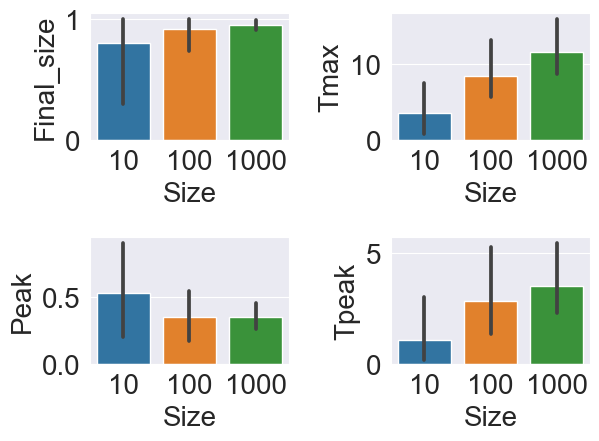

In [128]:
if Typ != "meta":
    fig,ax0 = plt.subplots(nrows=2,ncols=2)
    ax0 = ax0.flatten()
    counter = 0
    for j in ["Final_size","Tmax","Peak","Tpeak"]:
        sns.barplot(x=df["Size"][df["Para"]==f"{j}"],y=df["Value"][df["Para"]==f"{j}"],ax=ax0[counter], errorbar="pi")
        ax0[counter].set_ylabel(f"{j}")
        counter +=1
    fig.tight_layout()
    fig.show()

In [129]:
if Typ == "meta":
    fig,ax0 = plt.subplots(figsize = (10,10))
    for i in siz:
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0,binwidth = 0.5)
    ax0.set_xlabel("Time of final event")
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
    fig.legend(handles=legend_elements, bbox_to_anchor = (1,1))
    fig.tight_layout()
    fig.show()

In [130]:
if Typ == "meta":
    fig,ax0 = plt.subplots(figsize = (28,21), nrows = 3, ncols = 4)
    font = {'size': 20}
    plt.rc('font', **font)
    colours = ["deepskyblue","orange","green"]
    counter = -1
    point_size = 300
    cols = ["Node 1","Node 2", "Node 3", "Node 4"]
    rows = ["(a) Final\n Sizes","(b) Peak\n Infection","(c) Time\n at Peak\n Infection"]
    for ax, col in zip(ax0[0], cols):
        ax.set_title(col)
    for ax, row in zip(ax0[:,0], rows):
        ax2 = ax.twinx()
        # move extra axis to the left, with offset
        ax2.yaxis.set_label_position('left')
        ax2.spines['left'].set_position(('axes', -0.2))
        # hide spine and ticks, set group label
        ax2.spines['left'].set_visible(False)
        ax2.set_yticks([])
        ax2.set_ylabel(row, rotation=0, size='large',
                       ha='right', va='center')
    for i in siz:
        counter +=1
        for j in range(0,4):


            sns.histplot(np.array(plot_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[1,j],binwidth = 0.02,color=colours[counter])
            sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[2,j],binwidth = 0.2,color=colours[counter])
            sns.histplot(np.array(plot_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[0,j],binwidth = 0.02,color=colours[counter])

            #plot means
            if counter == 2:
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[810],ax=ax0[0,j], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[230], ax=ax0[1,j], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[210], color=colours[counter],ax=ax0[2,j],s=point_size,fc="none",ec =colours[counter])

                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[810],ax=ax0[0,j], color=colours[counter],marker="x",s=point_size)
                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[230], ax=ax0[1,j], color=colours[counter],marker="x",s=point_size)
                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[210], color=colours[counter],ax=ax0[2,j],marker="x",s=point_size)
            elif j ==0:
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[790],ax=ax0[0,j], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[210], ax=ax0[1,j], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[210], color=colours[counter],ax=ax0[2,j],s=point_size,fc="none",ec =colours[counter])

                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[790],ax=ax0[0,j], color=colours[counter],marker="x",s=point_size)
                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[210], ax=ax0[1,j], color=colours[counter],marker="x",s=point_size)
                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[210], color=colours[counter],ax=ax0[2,j],marker="x",s=point_size)
            else:
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[790],ax=ax0[0,j], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[210], ax=ax0[1,j], color=colours[counter],s=point_size,fc="none",ec =colours[counter])
                sns.scatterplot(x=np.mean(np.array(plot_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[190], color=colours[counter],ax=ax0[2,j],s=point_size,fc="none",ec =colours[counter])

                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[790],ax=ax0[0,j], color=colours[counter],marker="x",s=point_size)
                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i)), y =[210], ax=ax0[1,j], color=colours[counter],marker="x",s=point_size)
                sns.scatterplot(x=np.mean(np.array(point_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(point_dict[f"Size_{i}"]["Extinction"]) == 0]),y=[190], color=colours[counter],ax=ax0[2,j],marker="x",s=point_size)

            ax0[1,j].set_xlabel("Peak Infection")
            ax0[2,j].set_xlabel("Time at Peak Infection")
            ax0[0,j].set_xlabel("Final Size")
            ax0[0,j].set_ylim(0,860)
            ax0[1,j].set_ylim(0,400)
            ax0[2,j].set_ylim(0,400)
    fig.tight_layout()
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='QL1'),
                   Line2D([0], [0], color='orange',lw=4, label='QL10'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='QL100'),Line2D([0], [0], marker='o', color='black', label='Means',
                          markersize=10,ls="",markerfacecolor = "none"),Line2D([0], [0], marker='x', color='black', label='Means for simulations\n using the MLE',
                          markerfacecolor='black', markersize=10, ls="")]
    fig.legend(handles=legend_elements, bbox_to_anchor = (1,0.33))
    fig.tight_layout()
    fig.show()

In [131]:
if Typ == "meta":
    df = pd.DataFrame(columns=("Value","Size","Para","Node"))
    counter = 0
    for i in siz:
        for j in ["Final_size","Peak","Tpeak"]:
            for n in range(1,5):
                for k in range(len(plot_dict[f"Size_{i}"][f"{j}"][f"Node{n}"])):
                    df.loc[counter,"Size"] = i
                    df.loc[counter,"Para"] = j
                    df.loc[counter,"Node"] = n
                    if j in ["Final_size","Peak"]:
                        df.loc[counter,"Value"] = plot_dict[f"Size_{i}"][f"{j}"][f"Node{n}"][k]/int(i)
                    else:
                        df.loc[counter,"Value"] = plot_dict[f"Size_{i}"][f"{j}"][f"Node{n}"][k]
                    counter +=1

In [132]:
if Typ == "meta":
    fig,ax0 = plt.subplots(figsize = (16,12),nrows=3,ncols=4)

    j_count = -1
    for j in ["Final_size","Peak","Tpeak"]:
        j_count +=1
        for i in range(1,5):
            sns.barplot(x=df["Size"][df["Para"]==f"{j}"][df["Node"] == i],y=df["Value"][df["Para"]==f"{j}"][df["Node"] == i],ax=ax0[j_count,i-1])
            ax0[j_count,i-1].set_ylabel(f"{j}")

    fig.tight_layout()
    fig.show()